In [1]:
# !pip install pandas numpy geopandas matplotlib download

In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from download import download
%matplotlib inline

## Load data

In [3]:
url_postal_codes = "http://www.geoclip.fr/codes_postaux.zip"
path_postal = download(url_postal_codes, './postal_codes', kind='zip')
postal = gpd.read_file('postal_codes/codes_postaux_region.shp')

Replace is False and data exists, so doing nothing. Use replace==True to re-download the data.


## Visualize our data

Text(0.5,1,'Distribution of population by postal code')

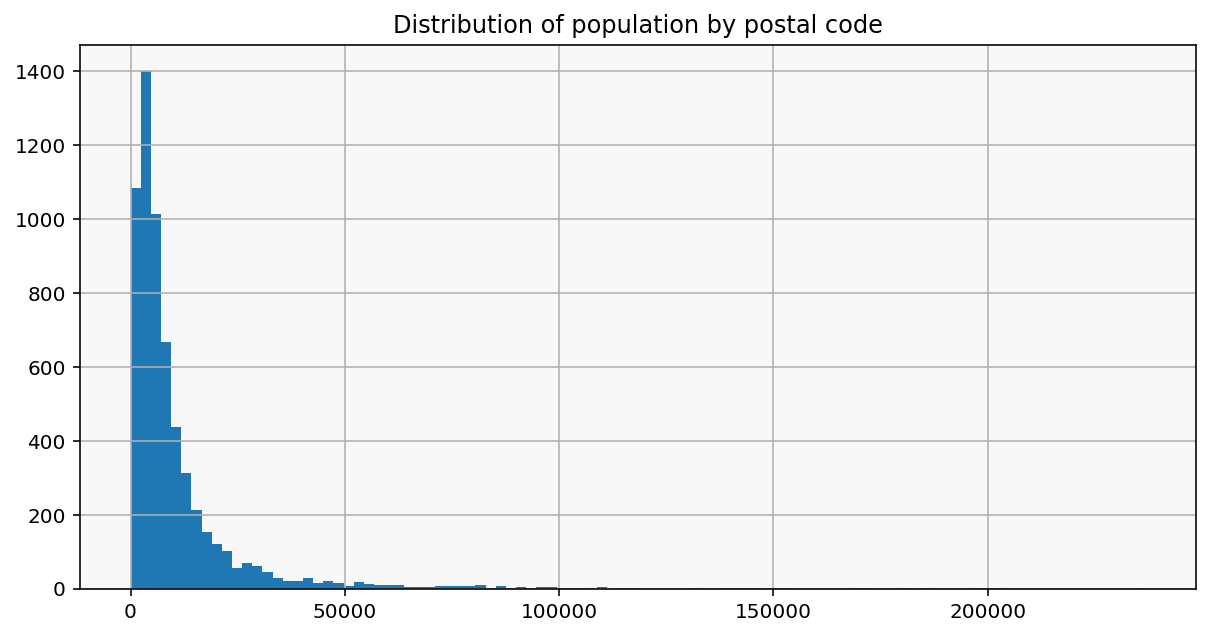

In [4]:
fig, ax = plt.subplots(figsize=(10, 5))
postal['POP2010'].hist(bins=100, ax=ax)
ax.set_title("Distribution of population by postal code")

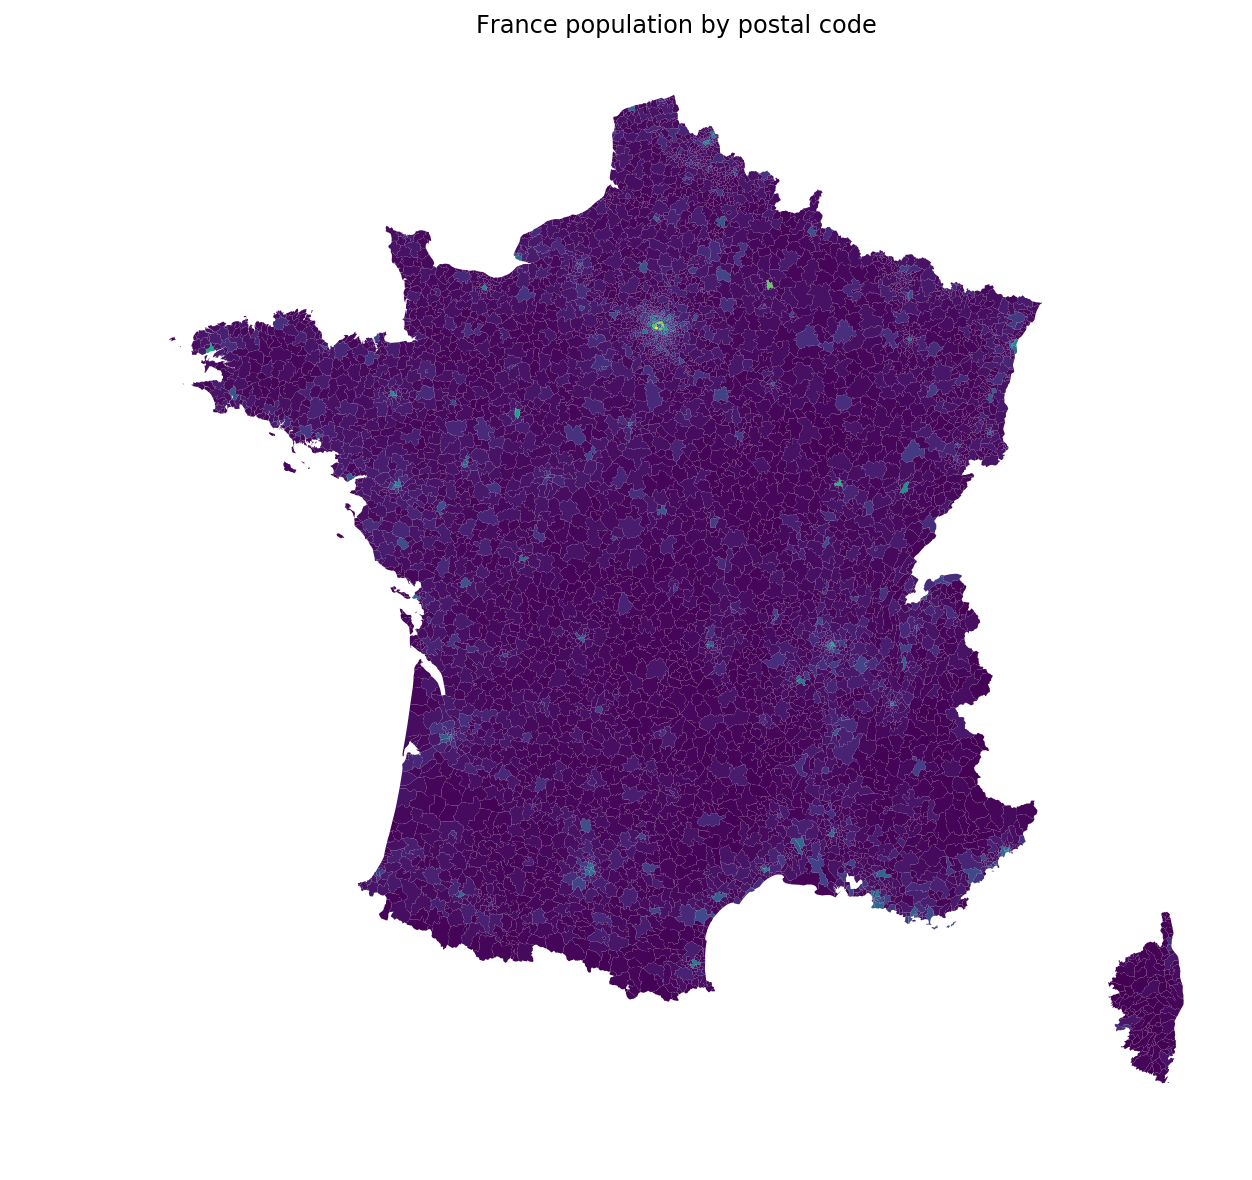

In [5]:
fig, ax = plt.subplots(figsize=(10, 10))
postal.plot(column='POP2010', ax=ax)
ax.set_title("France population by postal code")
ax.set_axis_off()

In [6]:
# Create a log column
postal = postal[postal['POP2010'] > 0].dropna(subset=['POP2010'])
postal['POP2010_log'] = np.log(postal['POP2010'])

Text(0.5,1,'Distribution of population by postal code (log transformed)')

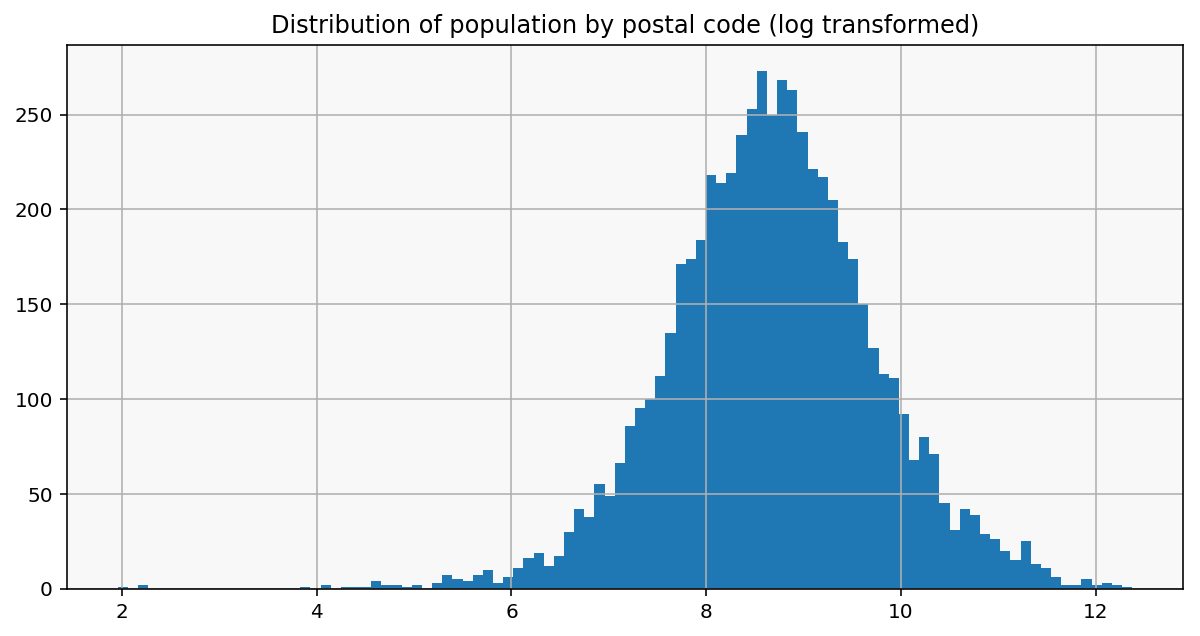

In [7]:
fig, ax = plt.subplots(figsize=(10, 5))
postal['POP2010_log'].dropna().hist(bins=100)
ax.set_title("Distribution of population by postal code (log transformed)")

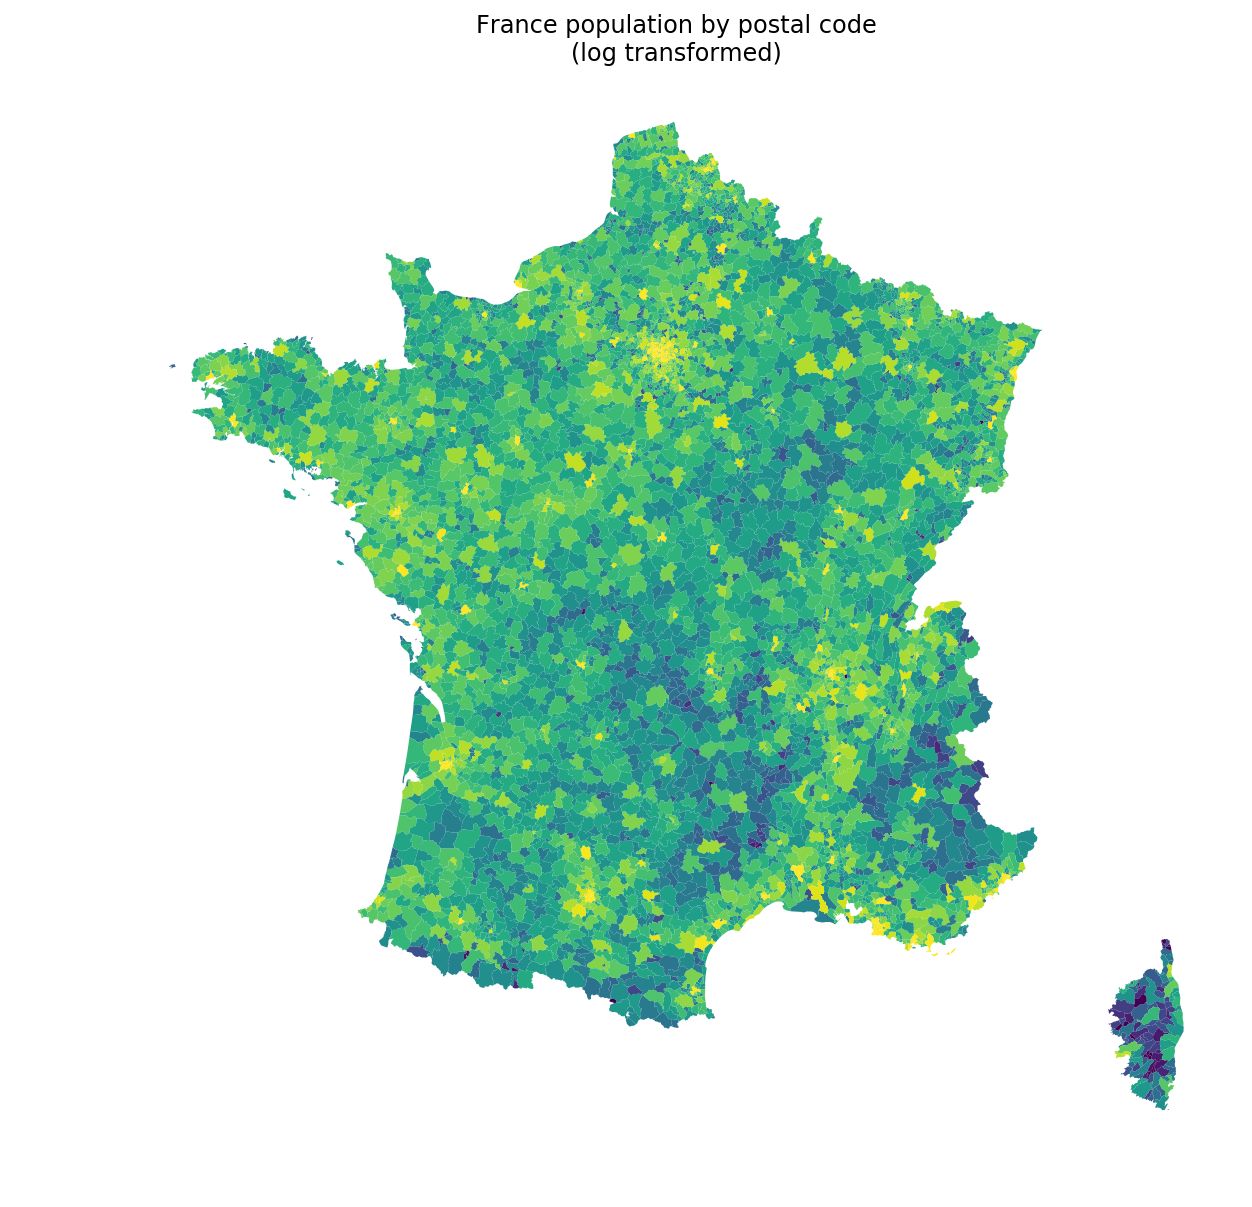

In [8]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = postal.plot(column='POP2010_log', vmin=5, vmax=11, ax=ax)
ax.set_title("France population by postal code\n(log transformed)")
ax.set_axis_off()